# Taller Fourier EDM - Clasificación de cargas de electrodomésticos

## Práctica 0 - Python, manejo de datos, gráficas

### Objetivos:
En esta práctica se introducen algunas herramientas de manejo de datos en Python que van a ser útiles para las prácticas del curso


### Materiales

Links a tutoriales y recursos de Python en el eva del curso

### Trabajo a realizar

A lo largo del notebook encontraran las siguientes palabras claves:

* \# COMPLETAR  -> indica que se requiere completar el código. 
  
  
* \# EXPERIMENTAR -> indica que la celda contiene código funcional que permite experimentar variando el tipo de electrodoméstico, parámetros de las funciones, etc. Es posible, si lo requiere la experimentación duplicar la celda y realizar los cambio que sean de interés en el código.
  
  
* \# DISCUTIR -> se espera una discusión de los experimentos realizados y/o de las preguntas formuladas
  
  
  
* \# RESPONDER -> se espera una respuesta a preguntas concretas

## Parte 1 - Definición de los módulos a usar

In [1]:
#Carlos Gruss CI: 4.911.609-4
#FIng UdelaR 2021

# En esta celda se definen los modulos que se van a usar en el notebook 
# También se configuran otros aspectos comunes a toda la práctica

import os
import numpy as np
import pandas as pd
from scipy.fftpack import fft, fftshift, ifft
from scipy.signal import spectrogram
import matplotlib.pyplot as plt

#estilo de las gráficas
plt.style.use('default')

## Definición de cómo se quieren desplegar las gráficas (descomentar alguna de las tres opciones)
# graficas en línea  entre las celdas:
#%matplotlib inline 

# graficas en línea  entre las celdas con pan/zoom:
%matplotlib notebook

# graficas en ventanas externas:
# %matplotlib

In [2]:
# # Subida de archivo de datos si se usa Colab 
# from google.colab import files
# import io
# datos = files.upload()

## Parte 2 - Creación de arrays en numpy

In [3]:
print('-------------------------------------------------')
# Crear un array unidimensional
a = np.array([10, 20, 30, 40, 50])
print('array a')
# Imprimir el tipo de dato
print(a.dtype)
# Imprimir las dimensiones del array
print(a.shape)    


print('-------------------------------------------------')
# Crear un array bidimensional
b = np.array([[1.5, 2.3, 3], [4.44, 5.67, 6.88]])
print('array b')
print(b.dtype)
print(b.shape)
print(b)

print('-------------------------------------------------')
# Crear un array de un tipo de datos específico
c = np.array([[1,2,3],[4,5,6]], dtype = np.uint8)
print('array c:  tipo:',c.dtype)


print('-------------------------------------------------')
# Existen distintas funciones que permiten crear arrays en numpy
# Ej. np.ones(...), np.zeros(...), np.random.rand(...)
z = np.zeros((3,4))
print('array z\n', z)

print('-------------------------------------------------')
# string con formato 
np_array = b
info = 'tipo:{}, dimensión:{}, tamaño:{}'.format(np_array.dtype, np_array.ndim, np_array.shape)
print(np_array)
print(info)


-------------------------------------------------
array a
int32
(5,)
-------------------------------------------------
array b
float64
(2, 3)
[[1.5  2.3  3.  ]
 [4.44 5.67 6.88]]
-------------------------------------------------
array c:  tipo: uint8
-------------------------------------------------
array z
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
-------------------------------------------------
[[1.5  2.3  3.  ]
 [4.44 5.67 6.88]]
tipo:float64, dimensión:2, tamaño:(2, 3)


In [4]:
# EXPERIMENTAR Duplicar la celda de arriba y realizar pruebas 

print('-------------------------------------------------')
# Crear un array unidimensional "vertical"
columna = np.array([[1],[2],[3]])
print('array columna')
# Imprimir el tipo de dato
print(columna.dtype)
# Imprimir las dimensiones del array
print(columna)
print(columna.shape)    

print('-------------------------------------------------')
# Crear un array bidimensional
b = np.random.rand(3,3)
print('array b')
print(b.dtype)
print(b.shape)
print(b)

print('-------------------------------------------------')
# Crear un array de un tipo de datos específico
c = np.array([[1,2,3],[4,5,6]], dtype = np.uint8)
print('array c:  tipo:',c.dtype)


print('-------------------------------------------------')
# Existen distintas funciones que permiten crear arrays en numpy
# Ej. np.ones(...), np.zeros(...), np.random.rand(...)
z = np.full((3,4), 42)
Id = np.eye(3)
print('matriz constante z\n', z)
print('matriz identidad de dimensión {}:\n{}'.format(Id.shape, Id))

print('-------------------------------------------------')
# string con formato 
np_array = b
info = 'tipo:{}, dimensión:{}, tamaño:{}'.format(np_array.dtype, np_array.ndim, np_array.shape)
print(np_array)
print(info)

print('-------------------------------------------------')
# Operaciones con matrices
# Transponer
fila = columna.T
print(fila)
print(fila.shape, "\n")

# Flattening
print(z.flatten(), "\n")

# VAPs y VEPs
vapsB, vepsB = (np.linalg.eig(b))
print('los vaps de b son:\n{}\n y sus veps son:\n{}\n'.format(vapsB, vepsB))\

# Suma, producto matricial y producto entrada/entrada:
c = np.array([[1,2],[2,2]])
print(c + c, "\n")
print(c @ c, "\n")
print(c * c, "\n")



-------------------------------------------------
array columna
int32
[[1]
 [2]
 [3]]
(3, 1)
-------------------------------------------------
array b
float64
(3, 3)
[[0.97184617 0.58276219 0.39137655]
 [0.87772063 0.83458893 0.44050114]
 [0.28429876 0.97362365 0.41345375]]
-------------------------------------------------
array c:  tipo: uint8
-------------------------------------------------
matriz constante z
 [[42 42 42 42]
 [42 42 42 42]
 [42 42 42 42]]
matriz identidad de dimensión (3, 3):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
-------------------------------------------------
[[0.97184617 0.58276219 0.39137655]
 [0.87772063 0.83458893 0.44050114]
 [0.28429876 0.97362365 0.41345375]]
tipo:float64, dimensión:2, tamaño:(3, 3)
-------------------------------------------------
[[1 2 3]]
(1, 3) 

[42 42 42 42 42 42 42 42 42 42 42 42] 

los vaps de b son:
[1.96822899 0.19540406 0.05625579]
 y sus veps son:
[[-0.57480215 -0.39363623 -0.22261299]
 [-0.64213127 -0.08994607 -0.2778338 ]
 [-0

In [5]:
# EXPERIMENTAR con otras funciones como 
# np.arange(...), np.ones(...), np.random.rand(...), np.random.randint(...), np.eye(...) 

# Tip: SHIFT-TAB sobre la función muestra la ayuda

# Funcion arange
print(np.arange(5))
print(np.arange(50,110,10))

# Random
print(np.random.rand(1))
print(np.random.rand(3,3))
print(np.random.randint(100))


[0 1 2 3 4]
[ 50  60  70  80  90 100]
[0.44680708]
[[0.20363376 0.51032227 0.4685025 ]
 [0.62360269 0.86404908 0.33270298]
 [0.67540179 0.69633382 0.76023316]]
50


## Parte 2 - Acceso a los datos de un array
El acceso en cada dimensión sigue el esquema [desde(incluido) : hasta(excluido) : paso]   
Si no se especifica 'desde' entonces equivale a 'desde el índice 0'  
Si no se especifica 'hasta' entonces equivale a 'hasta el último (en el sentido que dictamine 'paso')'  
El 'paso' por defecto es 1



In [6]:
print('=================================================')
b = np.array([[1.5, 2.3, 3], [4.44, 5.67, 6.88]])
print('b')
print(b)
print('-------------------------------------------------')
# acceder a los elementos de un array
print('b[0, 0] b[0, 1] b[1, 0]')
print(b[0, 0], b[0, 1], b[1, 0])   

print('-------------------------------------------------')
# acceder a una columna de b
print('Columna 1 de b')
print(b[:,1])


print('=================================================')
a = np.array([10, 20, 30, 40, 50])
print('a')
print(a)
print('-------------------------------------------------')
# acceder al primer elemento de a
print(a[0])
# acceder a los dos primeros elementos de a
print(a[:2])
# acceder al último elemento de a
print(a[-1])
# acceder a los elementos de a pero saltando de a dos
print(a[::2])
# acceder a los elementos de a pero en orden invertido
print(a[-1::-1])


print('=================================================')
print('---vista y copia---------------------------------')
print('b inicial')
print(b)
print('-------------------------------------------------')

g = b[:,1]  # g es una vista de una columna de b
print(g)    # NO ES UNA COPIA
print(b)
g[0] = np.random.randint(100)  # cambiamos el primer elemento de g
print(g)
print(b)    # y vemos que b también cambió ->  SON LOS MISMOS DATOS !!

h = b[:,2].copy()  # h es una copia de una columna de b. SI cambiamos h, no va a cambiar b
print(h)
h[1] = np.random.randint(100)
print(h)
print(b)



b
[[1.5  2.3  3.  ]
 [4.44 5.67 6.88]]
-------------------------------------------------
b[0, 0] b[0, 1] b[1, 0]
1.5 2.3 4.44
-------------------------------------------------
Columna 1 de b
[2.3  5.67]
a
[10 20 30 40 50]
-------------------------------------------------
10
[10 20]
50
[10 30 50]
[50 40 30 20 10]
---vista y copia---------------------------------
b inicial
[[1.5  2.3  3.  ]
 [4.44 5.67 6.88]]
-------------------------------------------------
[2.3  5.67]
[[1.5  2.3  3.  ]
 [4.44 5.67 6.88]]
[27.    5.67]
[[ 1.5  27.    3.  ]
 [ 4.44  5.67  6.88]]
[3.   6.88]
[ 3. 77.]
[[ 1.5  27.    3.  ]
 [ 4.44  5.67  6.88]]


In [7]:
# EXPERIMENTAR Duplicar la celda de arriba y realizar pruebas 
# de distintas formas de acceder y/o modificar los elementos de un array  

print('=================================================')
b = np.array([[1.5, 2.3, 3], [4.44, 5.67, 6.88]])
print('b')
print(b)
print('-------------------------------------------------')
# acceder a los elementos de un array
print('b[0, 0] b[0, 1] b[1, 0]')
print(b[0, 0], b[0, 1], b[1, 0])   

print('-------------------------------------------------')
# acceder a una columna de b
print('Columna 1 de b')
print(b[:,1])


print('=================================================')
a = np.array([10, 20, 25, 30, 40, 43, 50])
print('a')
print(a)
print('-------------------------------------------------')
# acceder al primer elemento de a
print(a[0])
# acceder a un rango de valores de a
print(a[1:3])
# acceder a un rango de valores negativos
print(a[-3:-1])
# acceder a los elementos de a pero saltando de a cinco
print(a[::5])
# acceder a los elementos de a pero en orden invertido
print(a[-1::-1])
# acceder a valores de a que cumplan cierta condicion
apares = []
for i in range(a.size):
    if a[i]%2==0:
        apares.append(a[i])

print(apares)

print('=================================================')
print('---vista y copia---------------------------------')
print('b inicial')
print(b)
print('-------------------------------------------------')

g = b[:,1]  # g es una vista de una columna de b
print(g)    # NO ES UNA COPIA
print(b)
g[0] = np.random.randint(100)  # cambiamos el primer elemento de g
print(g)
print(b)    # y vemos que b también cambió ->  SON LOS MISMOS DATOS !!

h = b[:,2].copy()  # h es una copia de una columna de b. SI cambiamos h, no va a cambiar b
print(h)
h[1] = np.random.randint(100)
print(h)
print(b)

b
[[1.5  2.3  3.  ]
 [4.44 5.67 6.88]]
-------------------------------------------------
b[0, 0] b[0, 1] b[1, 0]
1.5 2.3 4.44
-------------------------------------------------
Columna 1 de b
[2.3  5.67]
a
[10 20 25 30 40 43 50]
-------------------------------------------------
10
[20 25]
[40 43]
[10 43]
[50 43 40 30 25 20 10]
[10, 20, 30, 40, 50]
---vista y copia---------------------------------
b inicial
[[1.5  2.3  3.  ]
 [4.44 5.67 6.88]]
-------------------------------------------------
[2.3  5.67]
[[1.5  2.3  3.  ]
 [4.44 5.67 6.88]]
[98.    5.67]
[[ 1.5  98.    3.  ]
 [ 4.44  5.67  6.88]]
[3.   6.88]
[ 3. 58.]
[[ 1.5  98.    3.  ]
 [ 4.44  5.67  6.88]]


In [8]:
# EXPERIMENTAR
# tratar de predecir la salida antes de correr la celda
# para correr, descomentar el código quitando las comillas triples

print('---------------------------------------')

x = np.arange(21,54,2) #21, 23, 25, 27, 29, 31... sin incluir el 54 (el ultimo del rango especificado)
print(x)

print(x[0]) #21

y = x[2:5] #25, 27, 29 
print(y)


z = x[::3] #todo salteando de a tres 
print(z) #21, 27...


w = x[-1:5:-1] #desde el ultimo hasta la posicion 5, pero en orden inverso. no inluye al ultimo (31)
print(w)

print('---------------------------------------')

invertido = x[-1::-1] 
print(invertido)

print('---------------------------------------')


print('---------------------------------------')

b = np.array([[1,2,3],[4,5,6]])
print(b, '\n')

y = b[:,1] #columna 1 de b
print(y, '\n')

y = b[:,-1::-1] #b pero con el orden de las columnas invertidas
print(y)

print('---------------------------------------')

---------------------------------------
[21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 53]
21
[25 27 29]
[21 27 33 39 45 51]
[53 51 49 47 45 43 41 39 37 35 33]
---------------------------------------
[53 51 49 47 45 43 41 39 37 35 33 31 29 27 25 23 21]
---------------------------------------
---------------------------------------
[[1 2 3]
 [4 5 6]] 

[2 5] 

[[3 2 1]
 [6 5 4]]
---------------------------------------


## Parte 3 - Crear arrays y graficar
1. Crear un array de N muestras de una señal sinusoidal de amplitud A y frecuencia F. La frecuencia de muestreo es Fs (la llamamos señal S1)
2. Crear un array de N muestras de una señal también sinusoidal, con las mismas características de (a) pero con un desfasaje de 15º (la llamamos señal S2)
3. Crear un vector de tiempos de largo N
4. En una misma gráficar mostrar las señales S1 y S2 en función del tiempo
5. En otra gráfica mostrar S2 vs. S1
6. Repetir las gráficas pero usando subplots


<IPython.core.display.Javascript object>


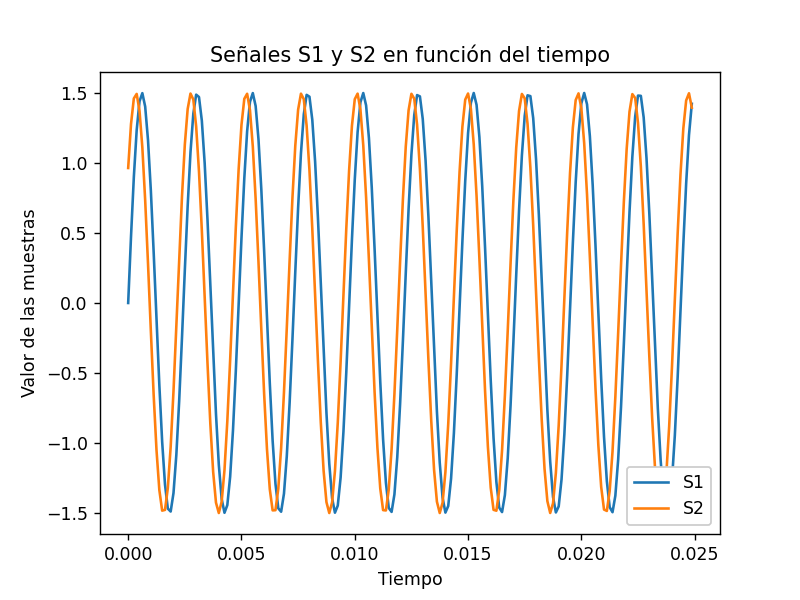

<IPython.core.display.Javascript object>


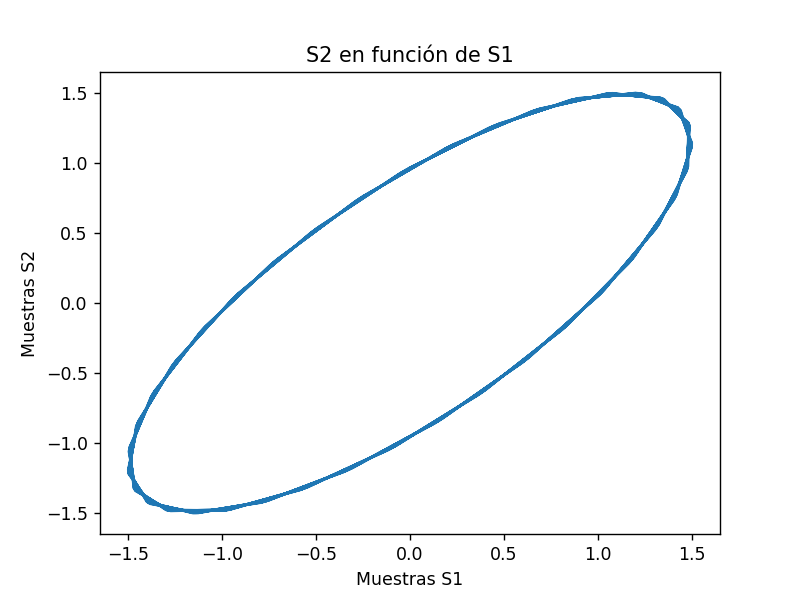

<IPython.core.display.Javascript object>


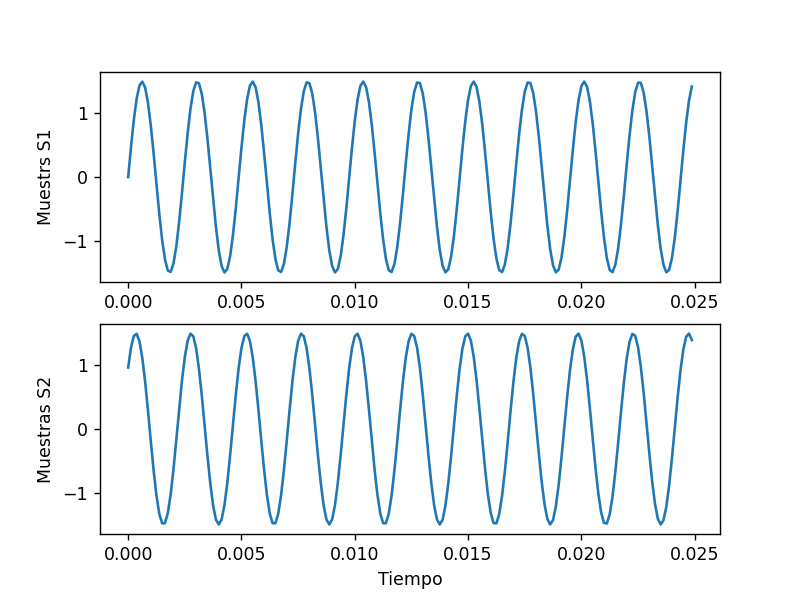

Text(0, 0.5, 'Muestras S2')

In [9]:
amplitud = 1.5 #A
frecuencia = 410 #F (Asumo que en Hertz)
theta = np.deg2rad(40) #Desfasaje Theta está en radianes

frecuencia_muestreo = 8000 #Fs
cantidad_muestras = 200 #N

# COMPLETAR

periodo_muestreo = 1/frecuencia_muestreo

# Definimos nuestras señales sinusoidales:
#S1 = 1.5*np.sin(x*frecuencia*2*np.pi)
#S2 = 1.5*np.sin(x*frecuencia*2*np.pi + theta)

'''
# Tomamos muestras
tiempos = []
S1_muestras = []
S2_muestras = [] 
for i in range(cantidad_muestras):
    tiempos.append(i*periodo_muestreo)
    S1_muestras.append(1.5*np.sin(i*frecuencia*2*np.pi*periodo_muestreo))
    S2_muestras.append(1.5*np.sin(i*frecuencia*2*np.pi*periodo_muestreo + theta))
'''

#Alternativamente, me di cuenta que era mas facil hacerlo como dice en la guia publicada
tiempos = np.arange(0, cantidad_muestras*periodo_muestreo, periodo_muestreo)
S1_muestras = 1.5*np.sin(tiempos*frecuencia*2*np.pi)
S2_muestras = 1.5*np.sin(tiempos*frecuencia*2*np.pi + theta)


#Graficamos
plt.figure(1)
plt.plot(tiempos, S1_muestras)
plt.plot(tiempos, S2_muestras)
plt.xlabel('Tiempo')
plt.ylabel('Valor de las muestras')
plt.title('Señales S1 y S2 en función del tiempo')
plt.legend(['S1', 'S2'], framealpha=1, loc='lower right')

plt.figure(2)
plt.plot(S1_muestras, S2_muestras)
plt.xlabel('Muestras S1')
plt.ylabel('Muestras S2')
plt.title('S2 en función de S1')

plt.figure(3)
plt.subplot(2,1,1)
plt.plot(tiempos, S1_muestras)
plt.ylabel('Muestrs S1')
plt.subplot(2, 1, 2)
plt.plot(tiempos, S2_muestras)
plt.xlabel('Tiempo')
plt.ylabel('Muestras S2')


## Parte 4 - Transformada de Fourier
Calcular la transformada de Fourier de la señal sinusoidal S1 de la parte anterior.   
Usar funciones del módulo scipy.fftpack   

<IPython.core.display.Javascript object>


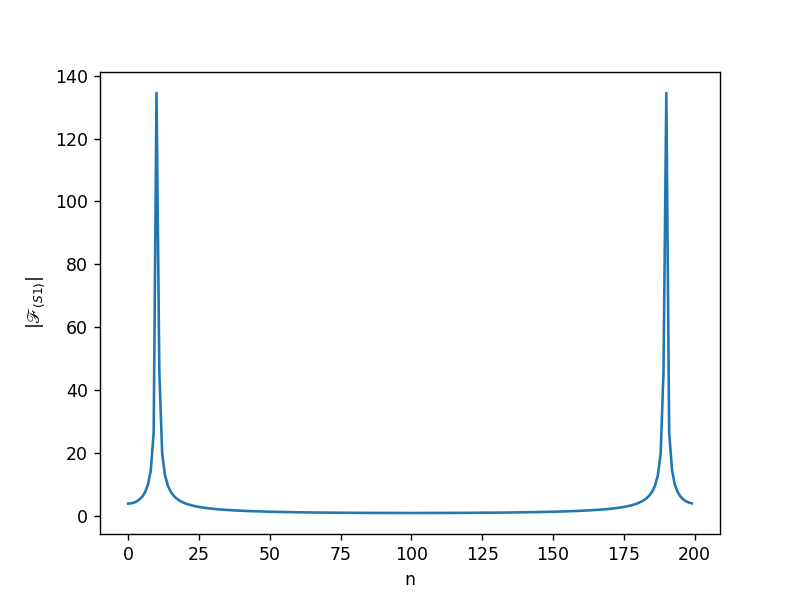

<IPython.core.display.Javascript object>


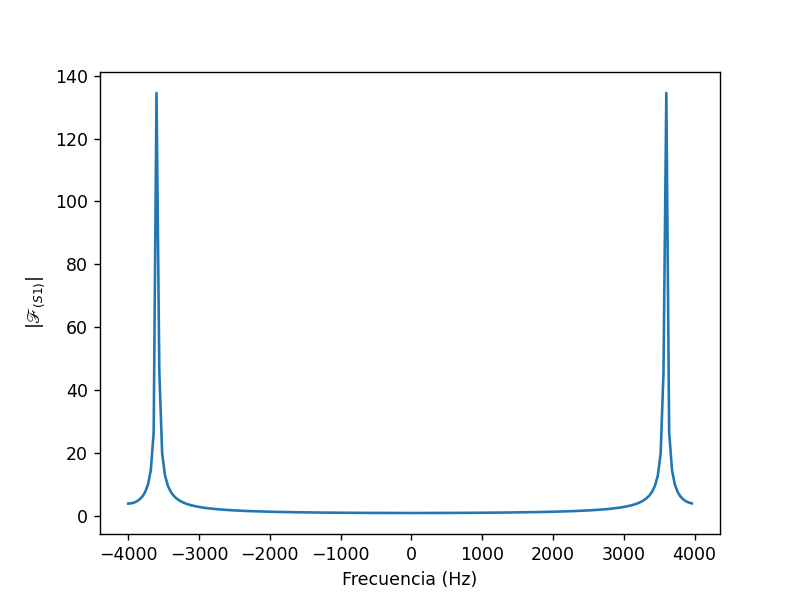

Text(0, 0.5, '$|\\mathscr{F}_{(S1)}|$')

In [10]:
# COMPLETAR  calcular y graficar

#FFT
fftS1 = fft(S1_muestras)

#Graficamos
plt.figure(4)
plt.plot(abs(fftS1))
plt.xlabel("n")
plt.ylabel("$|\mathscr{F}_{(S1)}|$")

plt.figure(5)
freqVals = np.arange(-cantidad_muestras/2, cantidad_muestras/2)*frecuencia_muestreo/cantidad_muestras
plt.plot(freqVals ,abs(fftS1))
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("$|\mathscr{F}_{(S1)}|$")


## Parte 5 - Cargar datos de un archivo de texto con funciones de numpy
Usar las funciones np.loadtxt(...) o np.genfromtxt(...) para cargar los datos del archivo 'datos.csv' en el directorio data a un array numpy.  
Tener en cuenta que los datos están en columnas separados por ',' y que en la primera fila se encuentran los encabezados.


Valores de corriente [-0.26 -0.24 -0.21 ... -0.38 -0.37 -0.34]
El tamaño del array de corrientes es (4009,) y el de voltajes es (4009,). El tipo de dato es float64


<IPython.core.display.Javascript object>


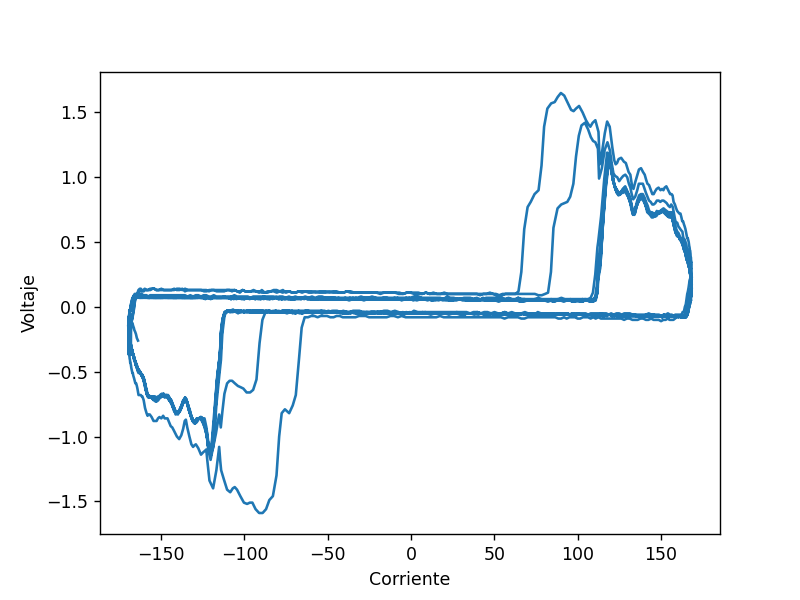

Text(0, 0.5, 'Voltaje')

In [11]:
# COMPLETAR cargar los datos a un array, mostrar propiedades del array y graficar

#Cargamos los datos
corrientes = (np.loadtxt("data/datos.csv", delimiter=",", skiprows=1, usecols=0))
voltajes = (np.loadtxt("data/datos.csv", delimiter=",", skiprows=1, usecols=1))

#Propiedades
print("Valores de corriente", corrientes)
print('El tamaño del array de corrientes es {} y el de voltajes es {}. El tipo de dato es {}'.format(
    corrientes.shape, voltajes.shape, corrientes.dtype))

#Graficamos
plt.figure(6)
plt.plot(voltajes, corrientes)
plt.xlabel("Corriente")
plt.ylabel("Voltaje")

## Parte 6 - Cargar datos de un archivo de texto con funciones de pandas
Usar la función pd.read_csv(...) del módulo pandas para leer los datos  del archivo 'datos.csv' en el directorio data a un 'dataframe'. Obtener a partir del dataframe un array de numpy.

      Corriente   Voltaje
0         -0.26   -163.89
1         -0.24   -164.57
2         -0.21   -165.10
3         -0.19   -165.66
4         -0.18   -166.04
...         ...       ...
4004      -0.41   -165.79
4005      -0.39   -166.22
4006      -0.38   -166.50
4007      -0.37   -166.97
4008      -0.34   -167.25

[4009 rows x 2 columns]


<IPython.core.display.Javascript object>


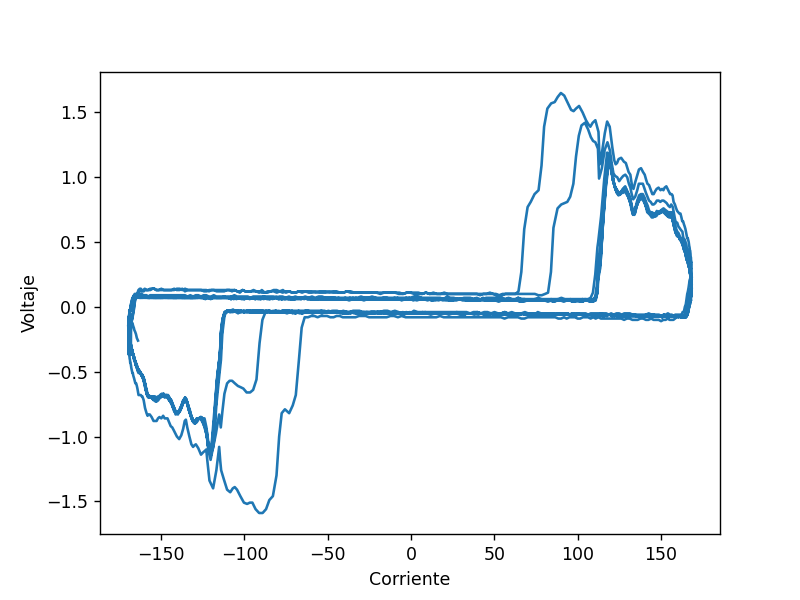

Text(0, 0.5, 'Voltaje')

In [12]:
# COMPLETAR cargar los datos a un dataframe, mostrar propiedades del dataframe, 
# obtener el array de numpy y graficar

datos = pd.read_csv("data/datos.csv")
print(datos)
corrientes = datos['Corriente']
voltajes = datos[' Voltaje']

#Graficamos
plt.figure(7)
plt.plot(voltajes, corrientes)
plt.xlabel("Corriente")
plt.ylabel("Voltaje")

## Parte 7 - Operaciones 


### Calcular promedios

In [13]:
np.random.seed(789)   #descomentar para chequear los resultados, comentar para que p cambie  en cada corrida
p = np.random.rand(10,3)
print(p, "\n")
print(p.shape)

print('---------------------------------------')

# calcular la media de todos los elementos de p:   0.48544143187616673
# COMPLETAR

acumula = 0
for x in p.flatten():
    acumula+=x 

media = acumula/p.flatten().shape
print('la media de los elementos es {}'.format(media[0]))

print('---------------------------------------')

# calcular la media de las columnas de p.          [0.54815742 0.39199966 0.51616722]
# COMPLETAR

for x in range(p.shape[1]):
    col0 = np.average(p[:,0])
    col1 = np.average(p[:,1])
    col2 = np.average(p[:,2])
    
mediaColumnas = np.array([col0, col1, col2])    
print('la media de las columnas es {}'.format(mediaColumnas))   

print('---------------------------------------')
    
# calcular la media de las filas de p.             
# [0.44912027 0.78623868 0.04879567 0.37839235 0.58661954 0.32941742 0.2934381  0.51920083 0.71125536 0.75193609]
# COMPLETAR

mediaFilas = []
for x in range(p.shape[0]):
    mediaFilas.append(np.average(p[x, :]))
    
print('la media de las filas es {}'.format(mediaFilas))  

[[0.32333482 0.23024711 0.79377887]
 [0.62441968 0.97541047 0.75888589]
 [0.01062005 0.02472696 0.11104001]
 [0.53814938 0.04545734 0.55157035]
 [0.72836505 0.29837837 0.73311522]
 [0.64052568 0.22060971 0.12711688]
 [0.32747317 0.41494326 0.13789786]
 [0.59117679 0.37050016 0.59592555]
 [0.78684917 0.84643988 0.50047704]
 [0.91066046 0.49328331 0.8518645 ]] 

(10, 3)
---------------------------------------
la media de los elementos es 0.48544143187616673
---------------------------------------
la media de las columnas es [0.54815742 0.39199966 0.51616722]
---------------------------------------
la media de las filas es [0.44912026720383813, 0.7862386794182165, 0.048795673274920924, 0.37839235221108325, 0.5866195446298424, 0.3294174240837241, 0.29343809690271394, 0.5192008318258212, 0.7112553625111921, 0.7519360867003156]


### Suma ponderada de dos arrays

<IPython.core.display.Javascript object>


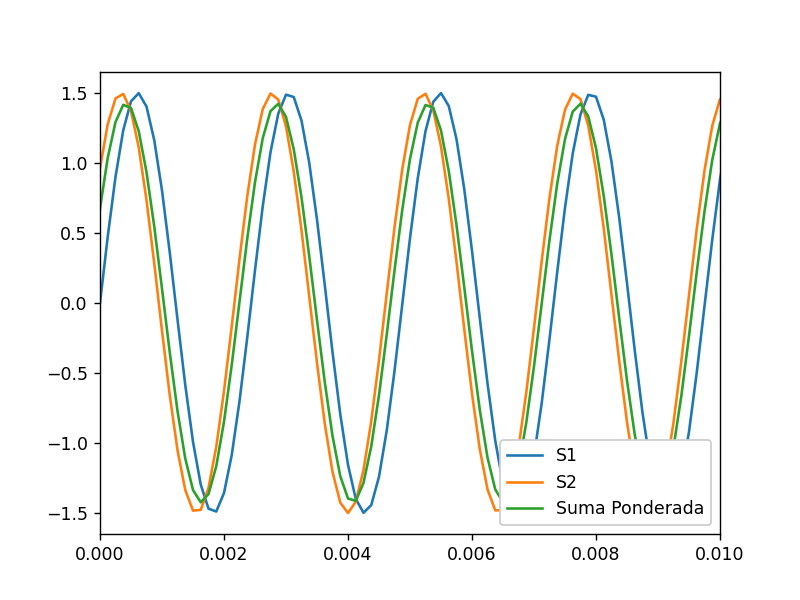

(0.0, 0.01)

In [14]:
# Realizar la suma ponderada de las señales S1 y S2 de la parte 3 con pesos 0.3 y 0.7 respectivamente
# COMPLETAR : calcular la suma ponderada y graficar

sumaPonderada = S1_muestras*0.3 + S2_muestras*0.7
plt.figure(8)
plt.plot(tiempos, S1_muestras)
plt.plot(tiempos, S2_muestras)
plt.plot(tiempos, sumaPonderada)
plt.legend(['S1', 'S2', 'Suma Ponderada'], framealpha=1, loc='lower right')
plt.xlim(0,0.01)

## Parte 8 - Funciones
Definir una función que realice la suma ponderada mencionada en la parte anterior.   
La función recibe dos arrays y dos pesos. Dentro de la función se chequea que los dos arrays sean de la mismas dimensiones, se realiza la suma ponderada y se devuelve el array resultado.



<IPython.core.display.Javascript object>


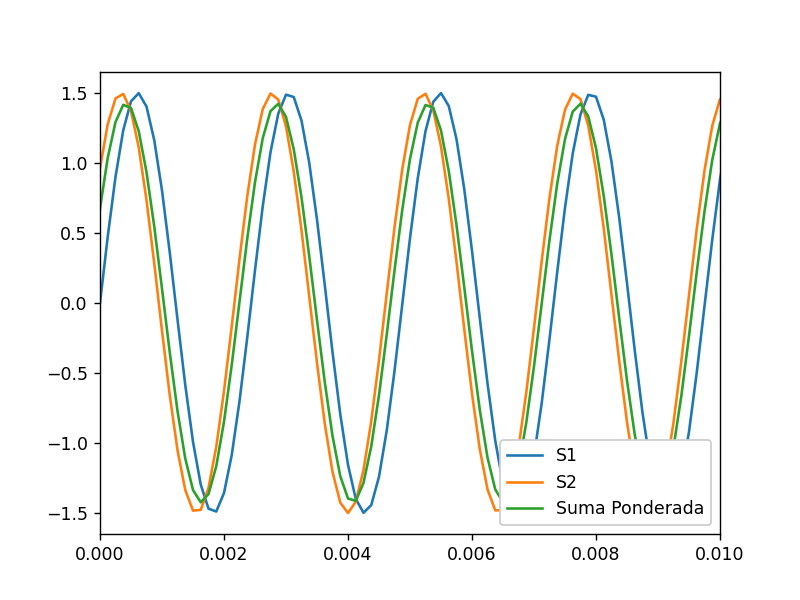

(0.0, 0.01)

In [15]:
def suma_ponderada(array1, array2, peso1, peso2):
    # COMPLETAR
    if array1.shape==array2.shape:
        resultado = (array1*peso1 + array2*peso2)/(peso1+peso2)
    else:
        resultado = "Error, chequear tamaños"
    return resultado

# usar la función
W = suma_ponderada(S1_muestras, S2_muestras, 0.3, 0.7)

# COMPLETAR graficar
plt.figure(9)
plt.plot(tiempos, S1_muestras)
plt.plot(tiempos, S2_muestras)
plt.plot(tiempos, W)
plt.legend(['S1', 'S2', 'Suma Ponderada'], framealpha=1, loc='lower right')
plt.xlim(0,0.01)